# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

## GROUP DETAILS

1. MEMBER-1: MANAN KUMAR (SID: 862393075)
2. MEMBER-2: NITYASH GAUTAM (SID: 862395403)

In [1]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
sharktank_df = pd.read_csv('sharktank.csv')

sharktank_df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# Replacing the Null Values with 0

shark_columns = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]

sharktank_df[shark_columns] = sharktank_df[shark_columns].fillna(0)

sharktank_df

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# Cleaning the "Amount" and "Equity" columns and changing them to float data type 
sharktank_df['Amount'] = sharktank_df['Amount'].str.replace('$','')
sharktank_df['Amount'] = sharktank_df['Amount'].str.replace(',','')
sharktank_df['Amount'] = sharktank_df['Amount'].astype(float)

sharktank_df['Equity'] = sharktank_df['Equity'].str.replace('%','')
sharktank_df['Equity'] = sharktank_df['Equity'].astype(float)

sharktank_df

C:\Users\nitya\AppData\Local\Temp\ipykernel_16732\945289602.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sharktank_df['Amount'] = sharktank_df['Amount'].str.replace('$','')


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# Selecting the funded companies from the data
funded_companies = sharktank_df[sharktank_df['Deal'] == 'Yes']

# Adding a column that shows valuation for each funded company from the data
funded_companies['Valuation'] = funded_companies['Amount'] / (funded_companies['Equity'] / 100)

# The company with highest valuation
most_valuable_company = funded_companies.loc[funded_companies['Valuation'].idxmax(), 'Company']

# The company that received the largest investment
highest_investment_company = funded_companies.loc[funded_companies['Amount'].idxmax(), 'Company']

print(f"Company with the highest Valuation is: {most_valuable_company}")
print()
print(f"Comapny that received the largest investment is: {highest_investment_company}")
print()

# Implementing a Check if they are the same companies or not
if most_valuable_company == highest_investment_company:
    print("Yes, the company with the highest valuation is the same as the company that received the largest investment.")
else:
    print("No, the company with the highest valuation is the not same as the company that received the largest investment.")
    
funded_companies

Company with the highest Valuation is: The Wall DoctoRX

Comapny that received the largest investment is: AirCar

No, the company with the highest valuation is the not same as the company that received the largest investment.


C:\Users\nitya\AppData\Local\Temp\ipykernel_16732\4149249056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funded_companies['Valuation'] = funded_companies['Amount'] / (funded_companies['Equity'] / 100)


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,9.090909e+04
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,9.200000e+05
5,1.0,2.0,A Perfect Pear,Yes,Food and Beverage,Female,500000.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,1.000000e+06
6,1.0,2.0,Classroom Jams,Yes,Children / Education,Male,250000.0,10.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,2.500000e+06
10,1.0,3.0,Turbobaster,Yes,Food and Beverage,Female,35000.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2% royalty,3.500000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,6.0,28.0,SynDaver Labs,Yes,Healthcare,Male,3000000.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.200000e+07
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000e+06
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...,2.812500e+06
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.500000e+06


**YOUR EXPLANATION HERE**

Company can receive a large investment but give away a big equity portion, resulting in a lower valuation.


## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

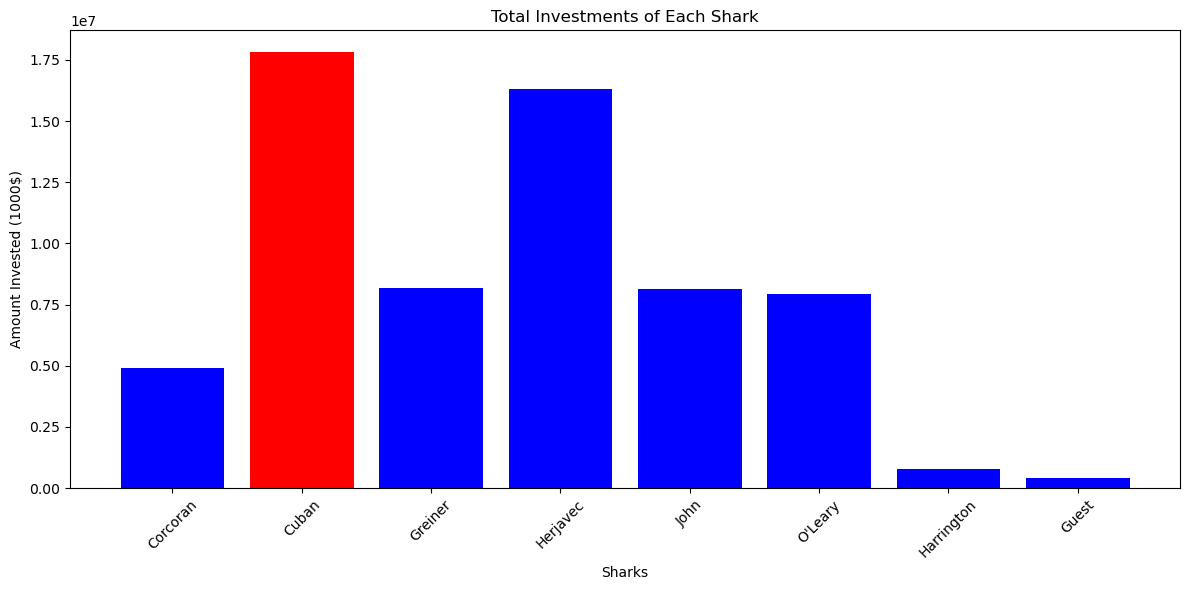

In [6]:
import matplotlib.pyplot as plt

# Adding a column to show how many sharks that invested in each venture
sharktank_df['num_sharks'] = sharktank_df[shark_columns].sum(axis=1)

# Adding a column to show the amount each shark invested for each venture
sharktank_df['each_shark_investment'] = sharktank_df['Amount'] / sharktank_df['num_sharks']

# Calculating the total investment made by each shark
shark_investments = {shark: (sharktank_df[shark] * sharktank_df['each_shark_investment']).sum() for shark in shark_columns}

# Finding the shark who made the max investment
max_shark = max(shark_investments, key=shark_investments.get)

###### VISUALIZATION ######

sharks = list(shark_investments.keys())
investments = list(shark_investments.values())

plt.figure(figsize=(12, 6))
plt.bar(sharks, investments, color='blue')
plt.title('Total Investments of Each Shark')
plt.ylabel('Amount Invested (1000$)')
plt.xlabel('Sharks')

# Rotating the X-Label ticks for better layout
plt.xticks(rotation=45)
plt.tight_layout()

# Highlighting the shark with the most investment
plt.bar(max_shark, shark_investments[max_shark], color='red')
plt.show()

**YOUR EXPLANATION HERE**

Based on the following graph cuban invested the most. 

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

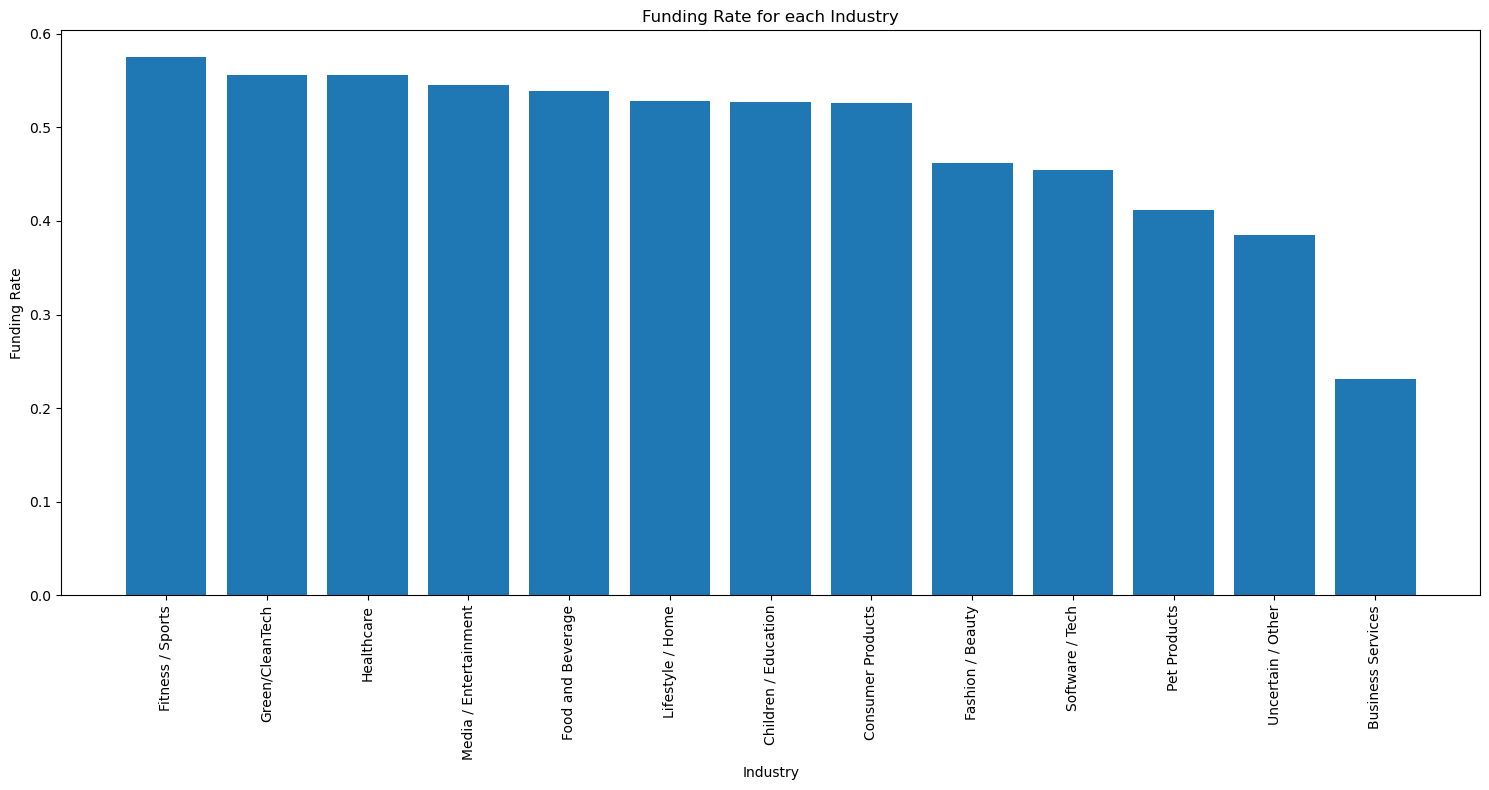

In [7]:
# Counting the number of companies present under each industry
total_companies = sharktank_df['Industry'].value_counts()

# Counting the the number companies funded per industry
funded_counts = funded_companies['Industry'].value_counts()

# Calculating the funding rate for each industry
funding_rate = (funded_counts / total_companies).fillna(0)

import matplotlib.pyplot as plt

# Sort industries by funding rate for clearer visualization
sorted_indices = funding_rate.sort_values(ascending=False).index
sorted_values = funding_rate.sort_values(ascending=False).values

###### VISUALIZATION ######

plt.figure(figsize=(15, 8))
plt.bar(sorted_indices, sorted_values)
plt.title('Funding Rate for each Industry')
plt.ylabel('Funding Rate')
plt.xlabel('Industry')

# Rotating the X-Label ticks for better layout
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**YOUR EXPLANATION HERE**

By calculating the financing rate for each industry to find the preferences in that sector. Then we represent the data using a bar chart with financing rates on the y-axis and industries on the x-axis. This displays the industries that the sharks like.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab by next Tuesday for full credit.